In [91]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mandelbrot import mandelbrot, mandelbrot_matrix, complex_matrix
from monte_carlo_integration import mc_int_estimate

In [92]:
def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

In [93]:
def mandelbrot_matrix(matrix, iterations):
    for i in range(np.shape(matrix)[0]):
        for j in range(np.shape(matrix)[1]):
            value = mandelbrot(matrix[i][j], iterations)
            matrix[i][j] = value
    return matrix

def mandelbrot(c, iterations):
    z = 0
    for _ in range(iterations):
        z = z**2 + c
    return z >= -2 and z <= 2

In [94]:
mat = complex_matrix(-2, 1, -1, 1, 100)

In [95]:
for i in range(np.shape(mat)[0]):
    for j in range(np.shape(mat)[1]):
        v = mandelbrot(mat[i][j], 100)
        mat[i][j] = v

C:\Users\kevin\AppData\Local\Temp\ipykernel_17784\1946657824.py:11: RuntimeWarning: overflow encountered in scalar power
  z = z**2 + c
C:\Users\kevin\AppData\Local\Temp\ipykernel_17784\1946657824.py:11: RuntimeWarning: invalid value encountered in scalar power
  z = z**2 + c


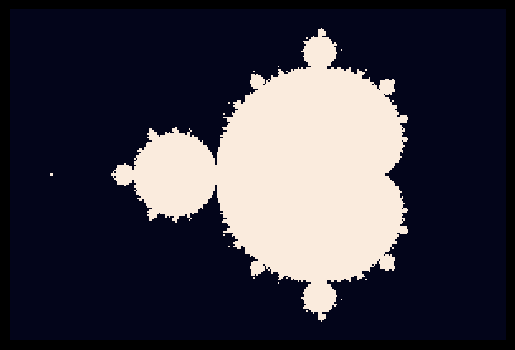

In [96]:
sns.heatmap(np.real(mat), xticklabels=0, yticklabels =0, cbar=False, square=True)
plt.show()

In [97]:
def mc_int_estimate(iterations, samples):
    matrix = complex_matrix(-2, 1, -1, 1, 100)
    mandelbrot = mandelbrot_matrix(matrix, iterations)
    in_mandelbrot = 0
    for i in range(samples):
        if np.real(mandelbrot[np.random.randint(np.shape(mandelbrot)[0]), np.random.randint(np.shape(mandelbrot)[1])]):
            in_mandelbrot += 1
    return in_mandelbrot/samples * ((1- -2)* (1- - 1))

C:\Users\kevin\AppData\Local\Temp\ipykernel_17784\1946657824.py:11: RuntimeWarning: overflow encountered in scalar power
  z = z**2 + c
C:\Users\kevin\AppData\Local\Temp\ipykernel_17784\1946657824.py:11: RuntimeWarning: invalid value encountered in scalar power
  z = z**2 + c


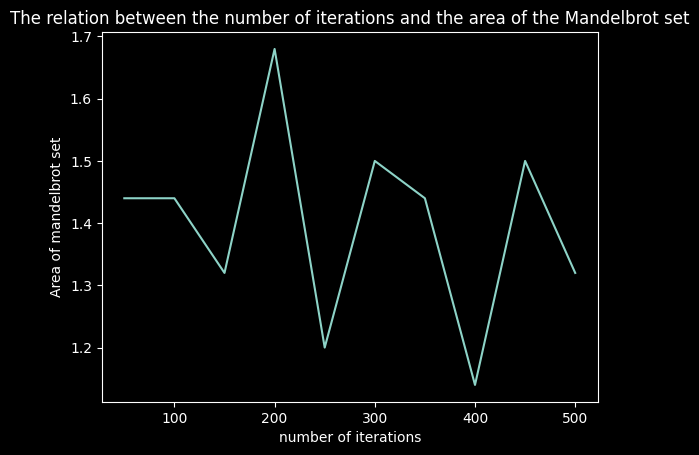

In [98]:
l = []
for i in np.linspace(50, 500, 10):
    l.append(mc_int_estimate(int(i), 100))
plt.plot(np.linspace(50, 500, 10), l)
plt.xlabel('number of iterations')
plt.ylabel('Area of mandelbrot set')
plt.title('The relation between the number of iterations and the area of the Mandelbrot set')
plt.show()


In [99]:
def statistics(iterations, samples, runs):#, type_of_sampling):      # Ik heb gebruik gemaakt van type_of_sampling zodat we hier 
    areas = []                                                      # ook over kunnen loopen ipv dat we de opties één voor één moeten runnen
    for _ in range(runs):
        areas.append(mc_int_estimate(int(iterations), samples))
    mean_area = np.mean(areas)
    confidence_interval = np.percentile(areas, [2.5, 97.5])
    return [mean_area, confidence_interval]

In [128]:
def stats_per_iteration_value(iterations, samples, runs): #Ik zou dit bijna een main willen noemen
    type_of_sampling = ['randomS', 'LatinS', 'Orthog']
    mean_area =[]
    confidence_interval =[]
    A_j = np.zeros((iterations, 3))
    for i in range(iterations):
        #for j in range(len(type_of_sampling)):
        mean_area, confidence_interval = statistics(int(i), samples, runs)#, type_of_sampling[j])
        A_j[i,0] = mean_area
        A_j[i,1] = confidence_interval[0]
        A_j[i,2] = confidence_interval[1]
    return A_j # en dan ipv dit returnen vanaf hier plotten

In [129]:
iterations = 100                            #Dit blok duurt een kwartier voor i=100, r=10 en s=100. 
runs = 10                                   #Als we het 'echt' willen runnen, duurt dit blok dus erg lang
samples = 100
A_j = stats_per_iteration_value(iterations, samples, runs)  

KeyboardInterrupt: 

Estimated A_M = 1.686 with a 95%-confidence interval of: [1.167  2.0265].


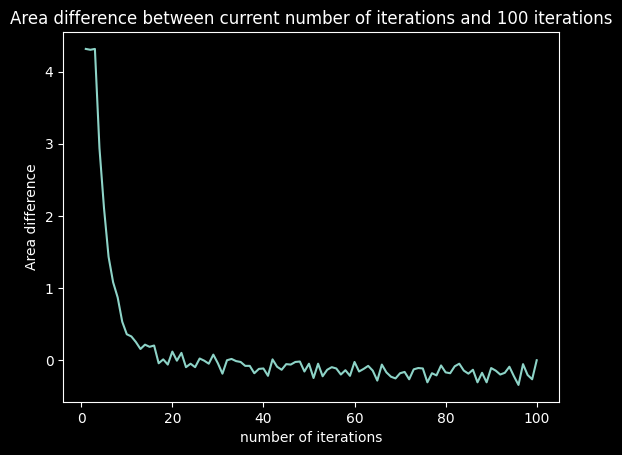

In [127]:
print(f'Estimated A_M = {A_j[-1][0]} with a 95%-confidence interval of: {A_j[-1][1:3]}.')
plt.plot(np.linspace(1,100, 100), A_j[:,0]- A_j[-1][0]*np.ones(len(A_j[:,0])))
plt.xlabel('number of iterations')
plt.ylabel('Area difference')
plt.title(f'Area difference between current number of iterations and {iterations} iterations')
plt.show()